In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
KO_genes = ['ARGLU1', 'ASF1B', 'MSN', 'DNAJC3', 'MLLT6', 'STK38L', 'HSPG2', 'CHPF', 'TBX1', 'BUB1', 'KIF11', 'RCN1']

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


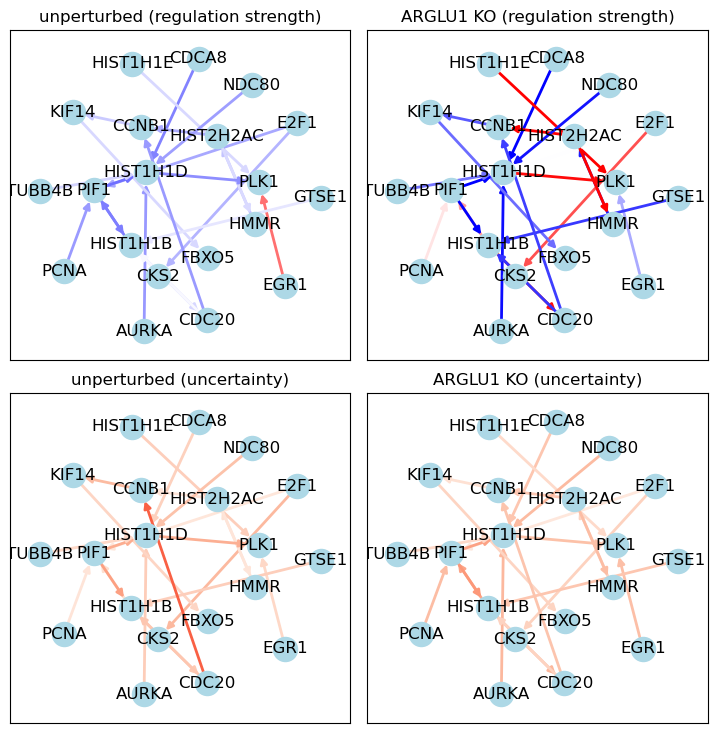

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


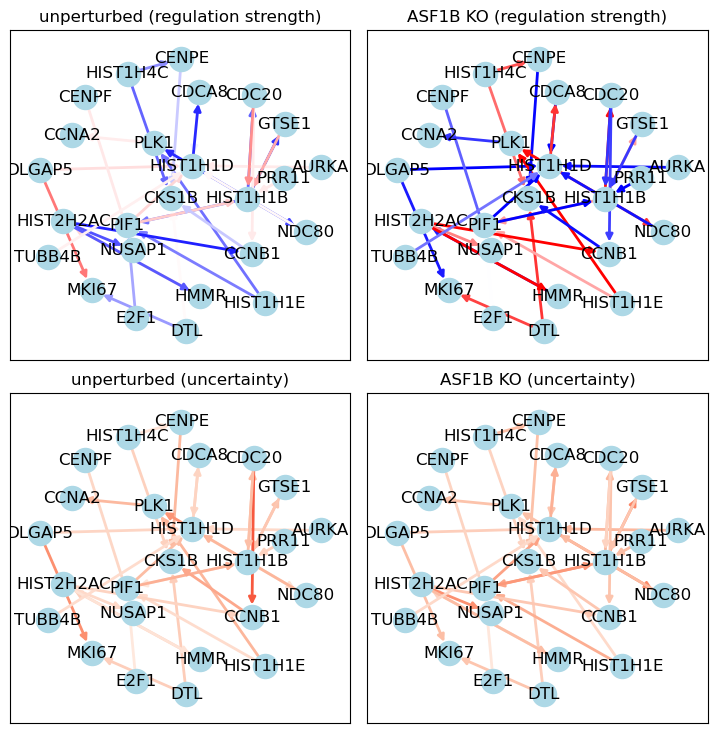

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


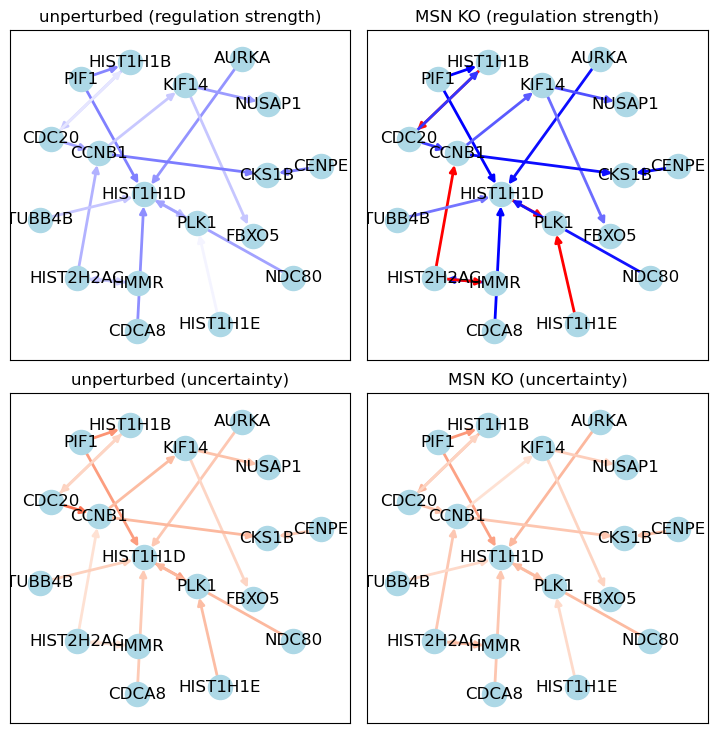

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


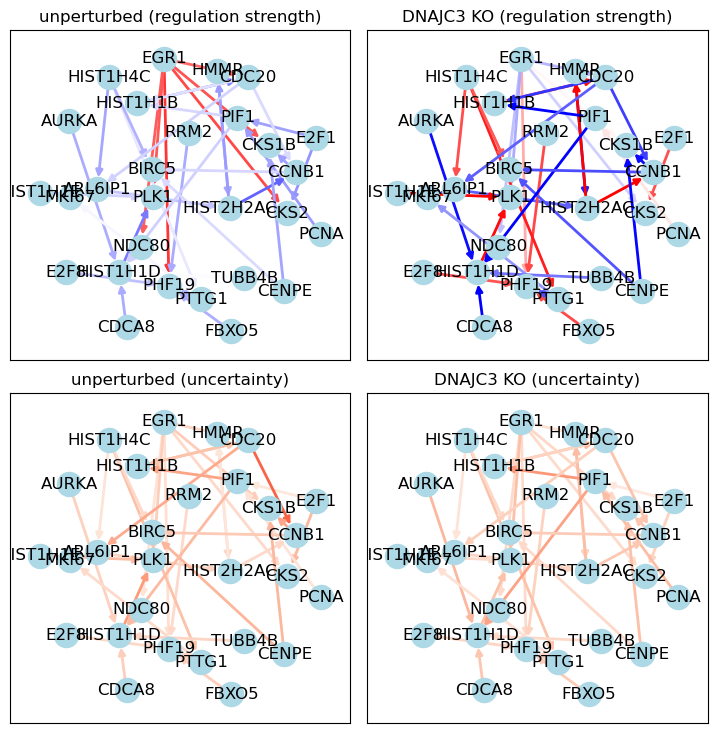

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


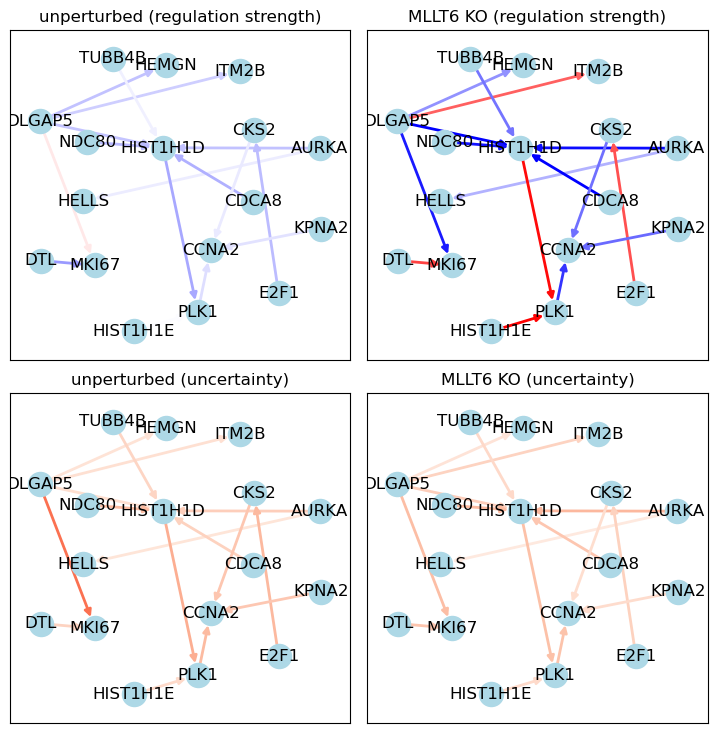

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


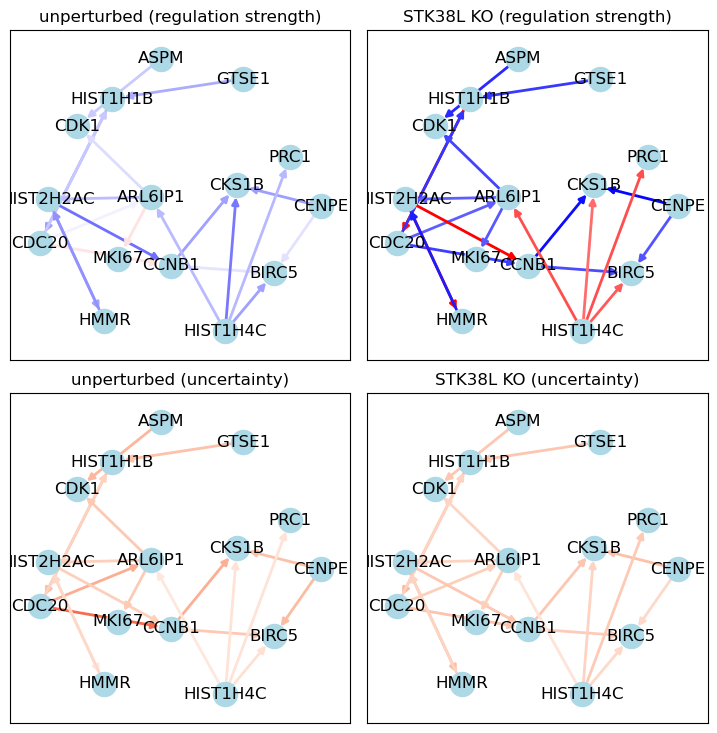

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


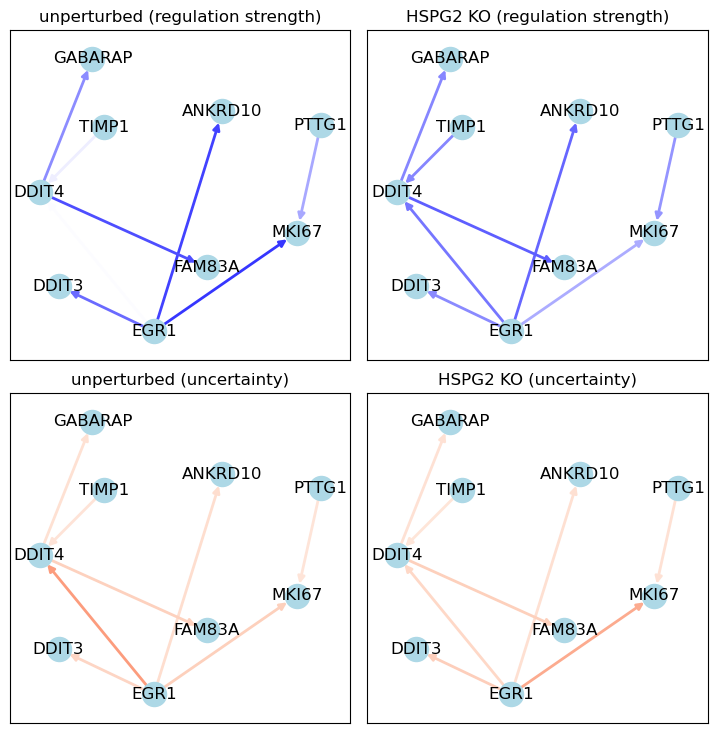

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


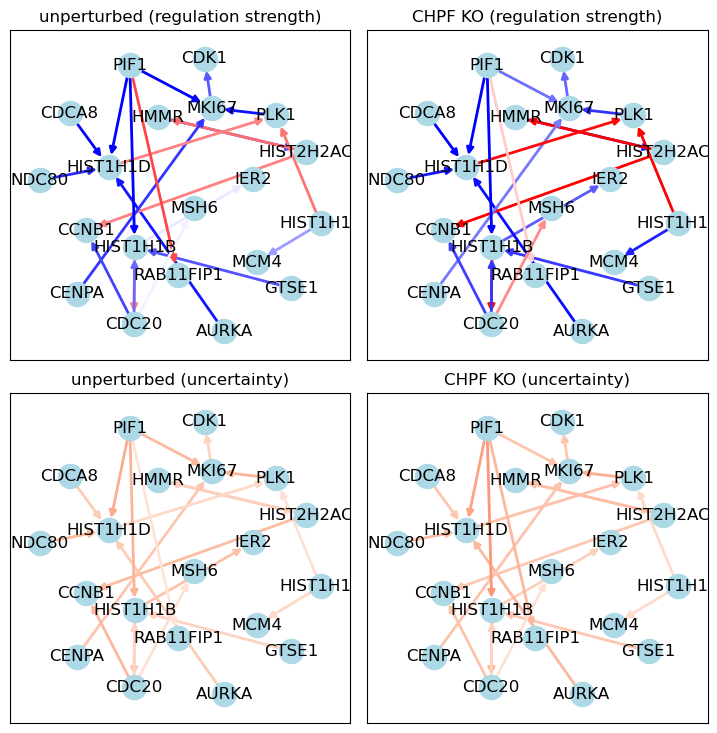

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


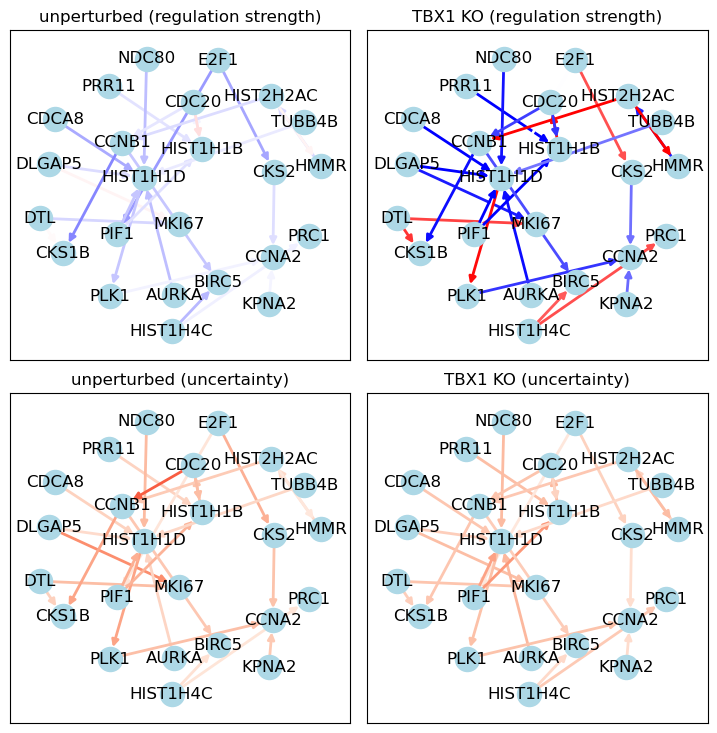

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


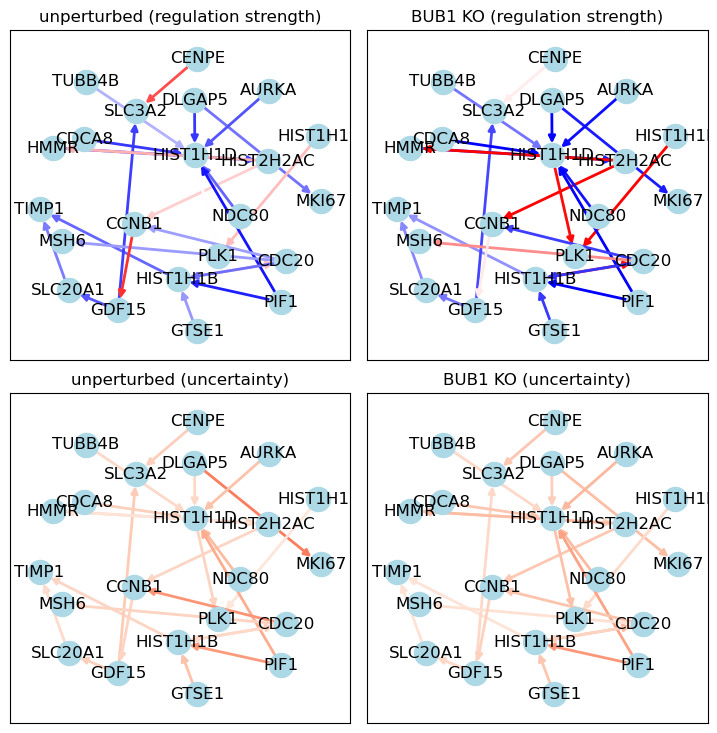

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


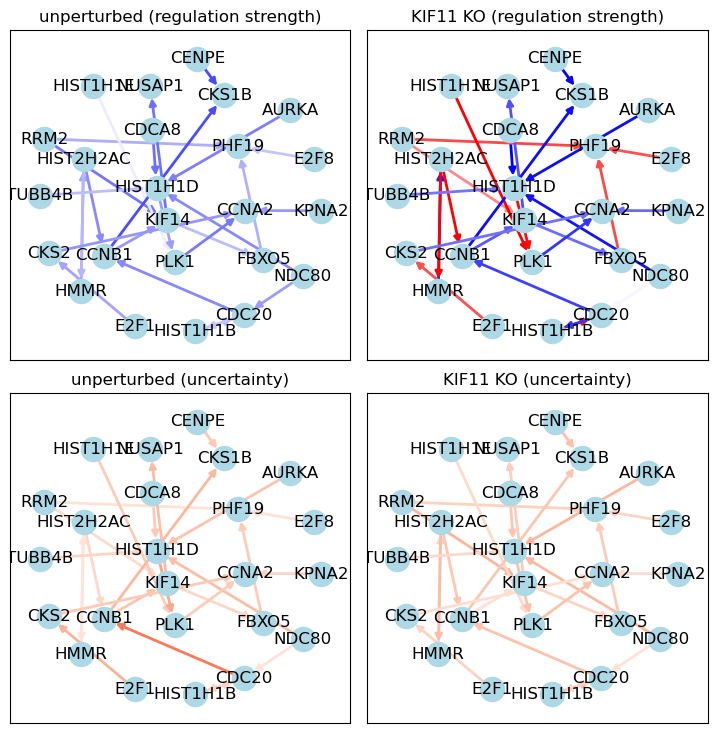

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


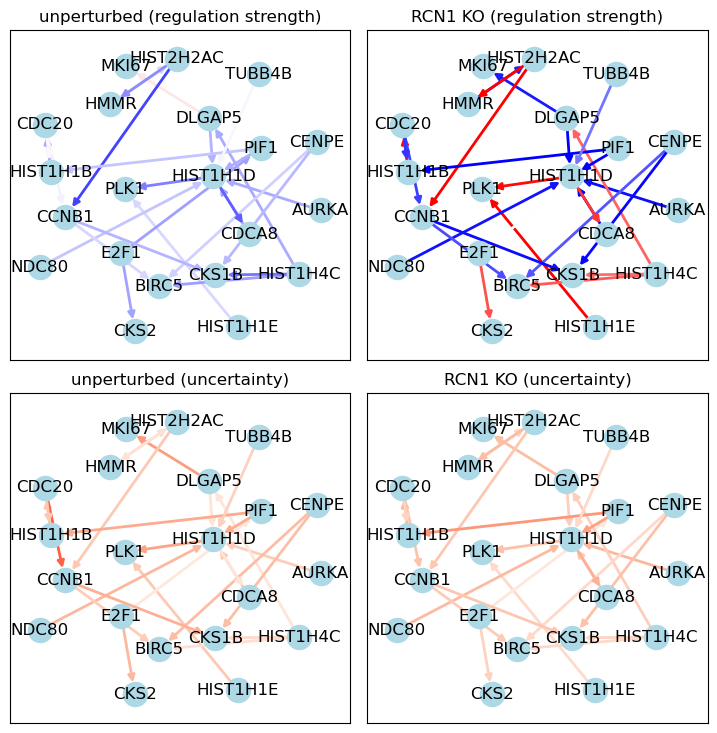

In [45]:
for ko in KO_genes:
    sub_g = nx.read_gexf("processed/sub_g_" + ko + ".gexf")

    pos=nx.arf_layout(sub_g, scaling=1., a=1.7)
    
    plt.rcParams["figure.figsize"] = (9, 9)
    fig, ax = plt.subplots(2, 2)

    nx.draw_networkx(sub_g, cmap = plt.get_cmap('jet'), pos=pos, node_color='lightblue',
            edge_color=list(nx.get_edge_attributes(sub_g,'mean_ko').values()),
            edge_cmap= plt.get_cmap('bwr'),
            with_labels = True,
            labels=nx.get_node_attributes(sub_g, "name"),
            edge_vmin=-.05, edge_vmax=.05, ax=ax[0, 0],
            width=2)
    ax[0, 1].set_title(ko + " KO (regulation strength)")

    nx.draw_networkx(sub_g, cmap = plt.get_cmap('jet'), pos=pos, node_color='lightblue',
            edge_color=list(nx.get_edge_attributes(sub_g,'mean_obs').values()),
            edge_cmap= plt.get_cmap('bwr'), 
            with_labels = True,
            labels=nx.get_node_attributes(sub_g, "name"),
            edge_vmin=-.05, edge_vmax=.05, ax=ax[0, 1],
            width=2)
    ax[0, 0].set_title("unperturbed (regulation strength)")

    nx.draw_networkx(sub_g, cmap = plt.get_cmap('jet'), pos=pos, node_color='lightblue',
            edge_color=list(nx.get_edge_attributes(sub_g,'std_ko').values()),
            edge_cmap= plt.get_cmap('Reds'),
            with_labels = True,
            labels=nx.get_node_attributes(sub_g, "name"),
            edge_vmin=0., edge_vmax=.05, ax=ax[1, 0],
            width=2)
    ax[1, 1].set_title(ko + " KO (uncertainty)")

    nx.draw_networkx(sub_g, cmap = plt.get_cmap('jet'), pos=pos, node_color='lightblue',
        edge_color=list(nx.get_edge_attributes(sub_g,'std_obs').values()),
        edge_cmap= plt.get_cmap('Reds'),
        with_labels = True,
        labels=nx.get_node_attributes(sub_g, "name"),
        edge_vmin=0., edge_vmax=.05, ax=ax[1, 1],
        width=2)
    ax[1, 0].set_title("unperturbed (uncertainty)")

    plt.subplots_adjust(wspace=.05, hspace=.1)
    plt.show()

## Colorbars

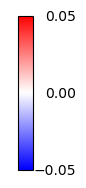

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

fraction = 1  # .05
vmin =-.05
vmax = .05

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, 
                                  cmap='bwr'
                                  # mpl.colors.Colormap("jets"),  # 'Blues'
                                 ),
            ax=ax, 
            # pad= .5, # .05, 
            # extend='both', 
            aspect=10,
            fraction=fraction, 
            orientation="vertical"
            )

cbar.set_ticks([vmin,vmax, 0.])
cbar.ax.tick_params(size=0)

for t in cbar.ax.get_yticklabels():
    t.set_horizontalalignment('right')   
    t.set_x(3.5)

ax.axis('off')
plt.show()

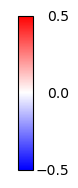

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

fraction = 1  # .05
vmin =-.5
vmax = .5

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, 
                                  cmap='bwr'
                                  # mpl.colors.Colormap("jets"),  # 'Blues'
                                 ),
            ax=ax, 
            # pad= .5, # .05, 
            # extend='both', 
            aspect=10,
            fraction=fraction, 
            orientation="vertical"
            )

cbar.set_ticks([vmin,vmax, 0.])
cbar.ax.tick_params(size=0)

for t in cbar.ax.get_yticklabels():
    t.set_horizontalalignment('right')   
    t.set_x(3.)

ax.axis('off')
plt.show()

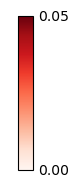

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

fraction = 1  # .05
vmin =.0
vmax = .05

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, 
                                  cmap='Reds'
                                  # mpl.colors.Colormap("jets"),  # 'Blues'
                                 ),
            ax=ax, 
            # pad=.05, 
            # extend='both', 
            aspect=10,
            fraction=fraction, 
            orientation="vertical")

cbar.set_ticks([vmin,vmax])
cbar.ax.tick_params(size=0)

for t in cbar.ax.get_yticklabels():
    t.set_horizontalalignment('right')   
    t.set_x(3.)

ax.axis('off')
plt.show()

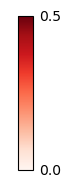

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

fraction = 1  # .05
vmin =.0
vmax = .5

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, 
                                  cmap='Reds'
                                  # mpl.colors.Colormap("jets"),  # 'Blues'
                                 ),
            ax=ax, 
            # pad=.05, 
            # extend='both', 
            aspect=10,
            fraction=fraction, 
            orientation="vertical")

cbar.set_ticks([vmin,vmax])
cbar.ax.tick_params(size=0)

for t in cbar.ax.get_yticklabels():
    t.set_horizontalalignment('right')   
    t.set_x(2.5)

ax.axis('off')
plt.show()

## Plots without uncertainty

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


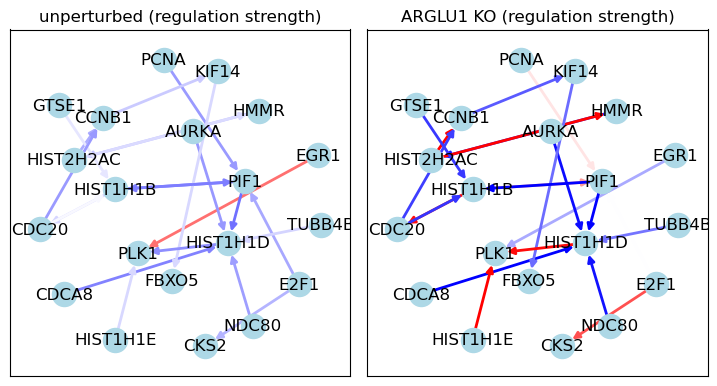

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


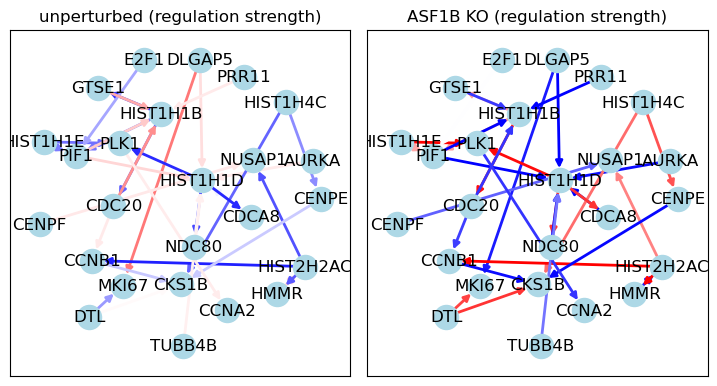

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


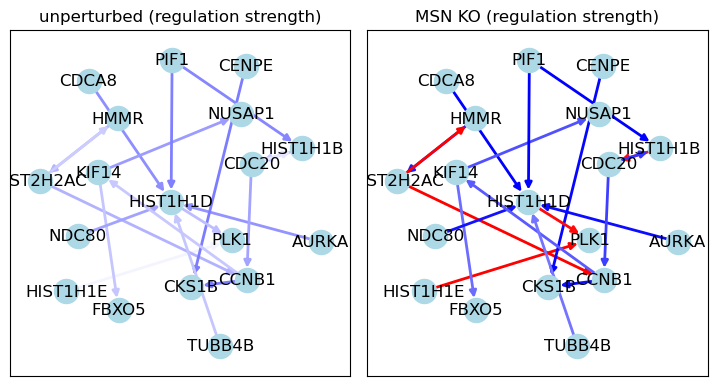

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


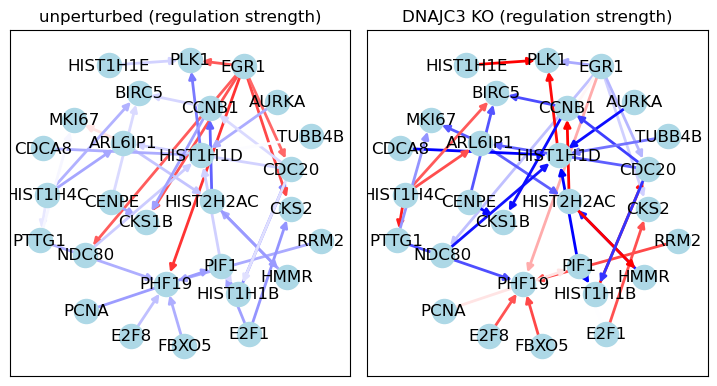

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


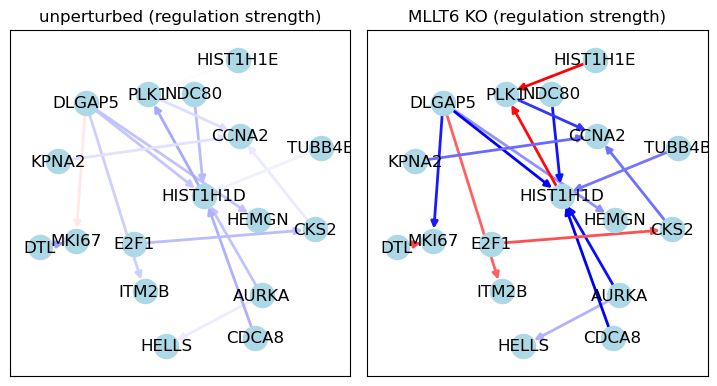

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


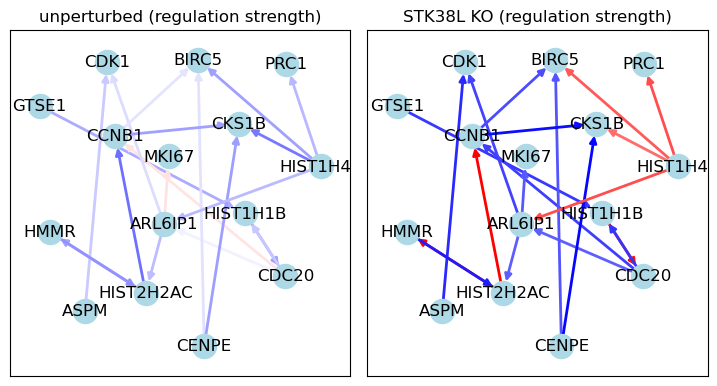

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


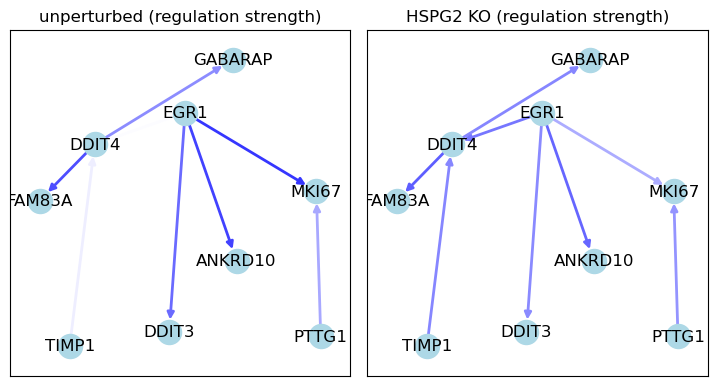

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


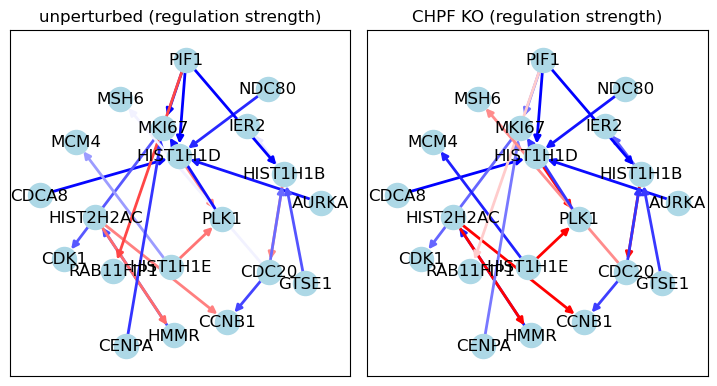

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


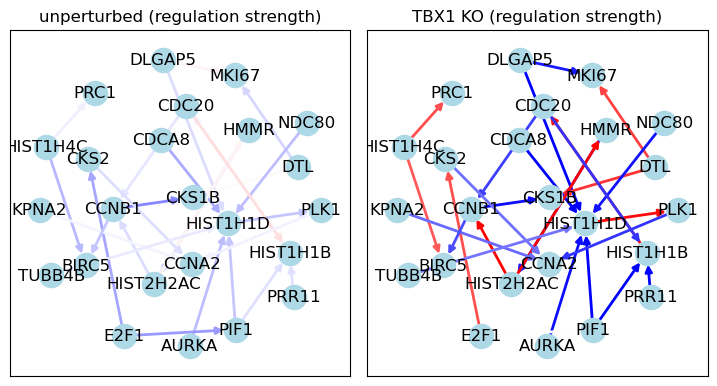

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


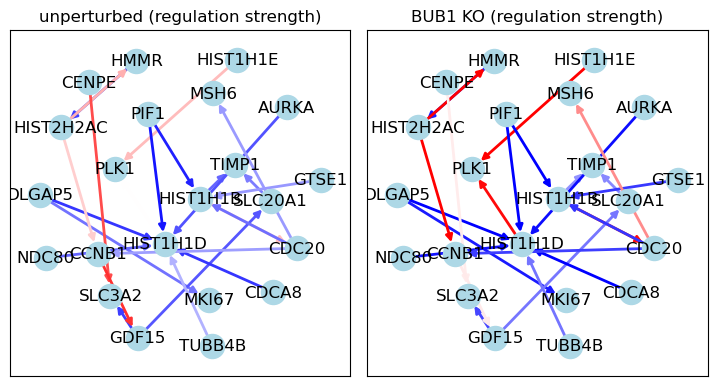

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


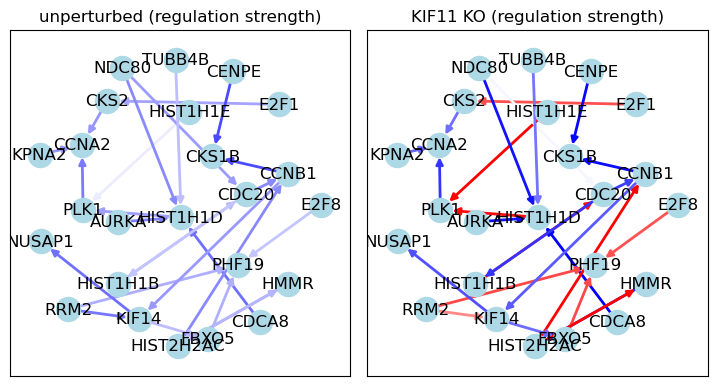

/Users/paul/miniconda3/envs/networkx/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


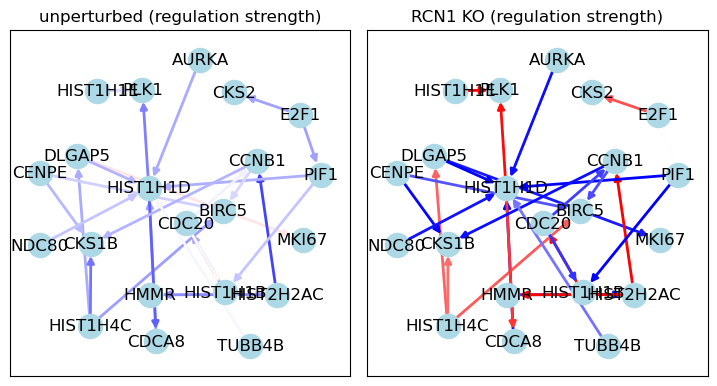

In [50]:
for ko in KO_genes:
    sub_g = nx.read_gexf("processed/sub_g_" + ko + ".gexf")

    pos=nx.arf_layout(sub_g, scaling=1., a=1.7)
    
    plt.rcParams["figure.figsize"] = (9, 4.5)
    fig, ax = plt.subplots(1, 2)

    nx.draw_networkx(sub_g, cmap = plt.get_cmap('jet'), pos=pos, node_color='lightblue',
            edge_color=list(nx.get_edge_attributes(sub_g,'mean_ko').values()),
            edge_cmap= plt.get_cmap('bwr'),
            with_labels = True,
            labels=nx.get_node_attributes(sub_g, "name"),
            edge_vmin=-.05, edge_vmax=.05, ax=ax[0],
            width=2)
    ax[1].set_title(ko + " KO (regulation strength)")

    nx.draw_networkx(sub_g, cmap = plt.get_cmap('jet'), pos=pos, node_color='lightblue',
            edge_color=list(nx.get_edge_attributes(sub_g,'mean_obs').values()),
            edge_cmap= plt.get_cmap('bwr'), 
            with_labels = True,
            labels=nx.get_node_attributes(sub_g, "name"),
            edge_vmin=-.05, edge_vmax=.05, ax=ax[1],
            width=2)
    ax[0].set_title("unperturbed (regulation strength)")

    plt.subplots_adjust(wspace=.05, hspace=.1)
    plt.show()